Let's first setup our imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [2]:
iris_data = datasets.load_iris()

Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [3]:
X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
y = iris_data.target

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

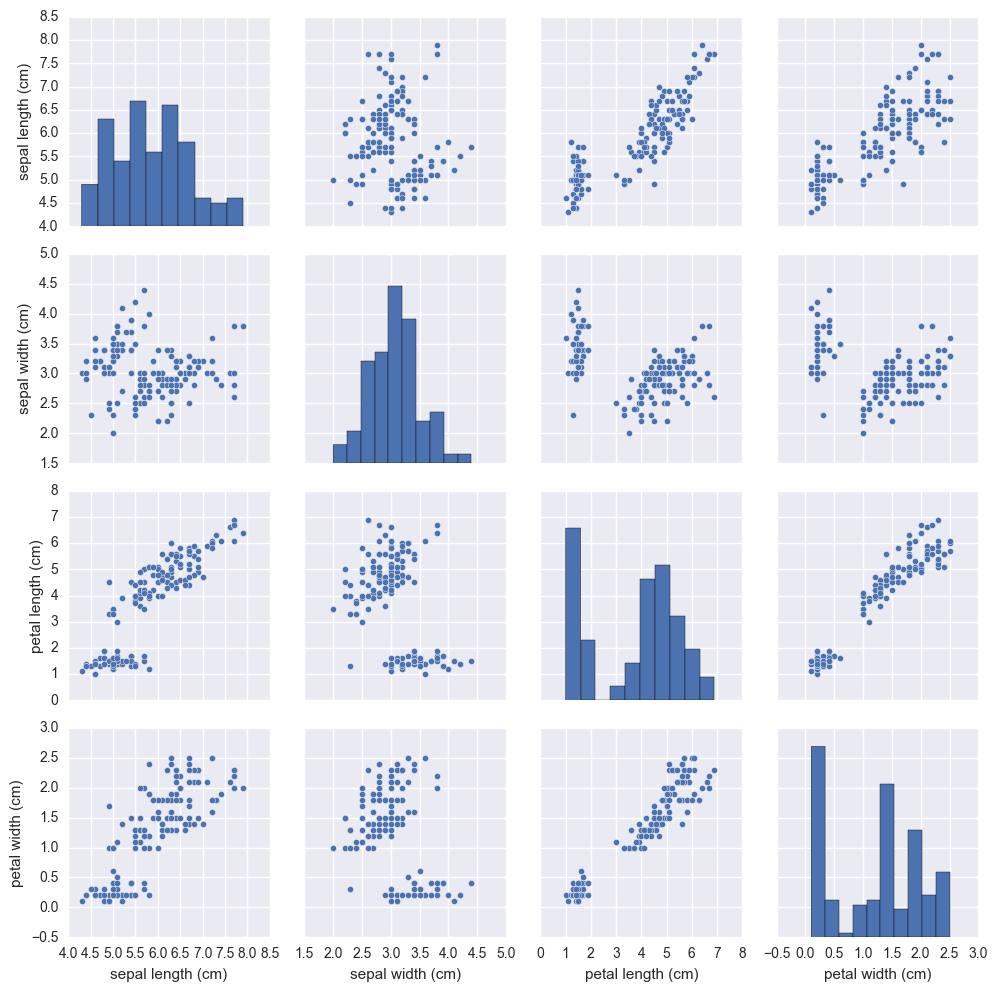

In [4]:
sns.pairplot(X);

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [5]:
k = 2

In [6]:
km = cluster.KMeans(n_clusters=k)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Compute the labels and centroids

In [7]:
labels = km.labels_
centroids = km.cluster_centers_

In [8]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
centroids

array([[ 5.00566038,  3.36037736,  1.56226415,  0.28867925],
       [ 6.30103093,  2.88659794,  4.95876289,  1.69587629]])

## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

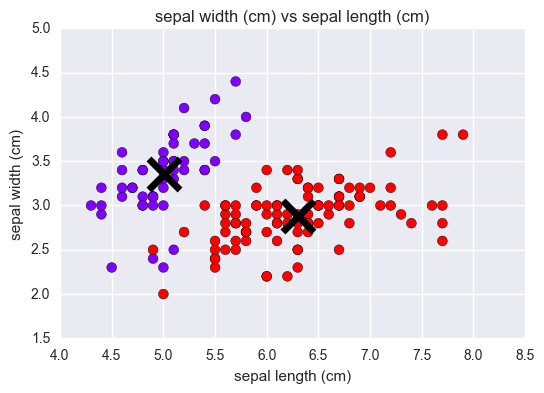

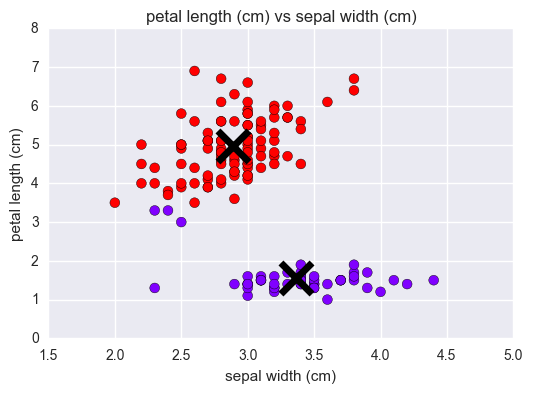

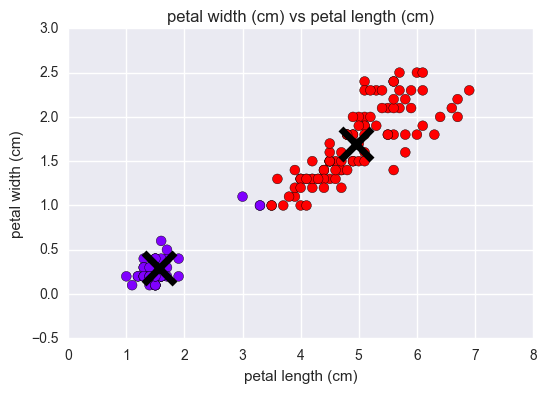

In [10]:
for i, _ in enumerate(X.columns[:-1]):
    plt.scatter(X.iloc[:,i], X.iloc[:,i+1], c=labels, s=50, cmap='rainbow');
    plt.scatter(centroids[:, i], centroids[:, i+1],
                marker='x', s=500, linewidths=5,
                color='k', zorder=10);
    plt.xlabel(X.columns[i]);
    plt.ylabel(X.columns[i+1]);
    plt.title(X.columns[i+1]+" vs "+X.columns[i]);
    plt.show();

Plot the predicted vs actual classifcations to see how our clustering analysis compares

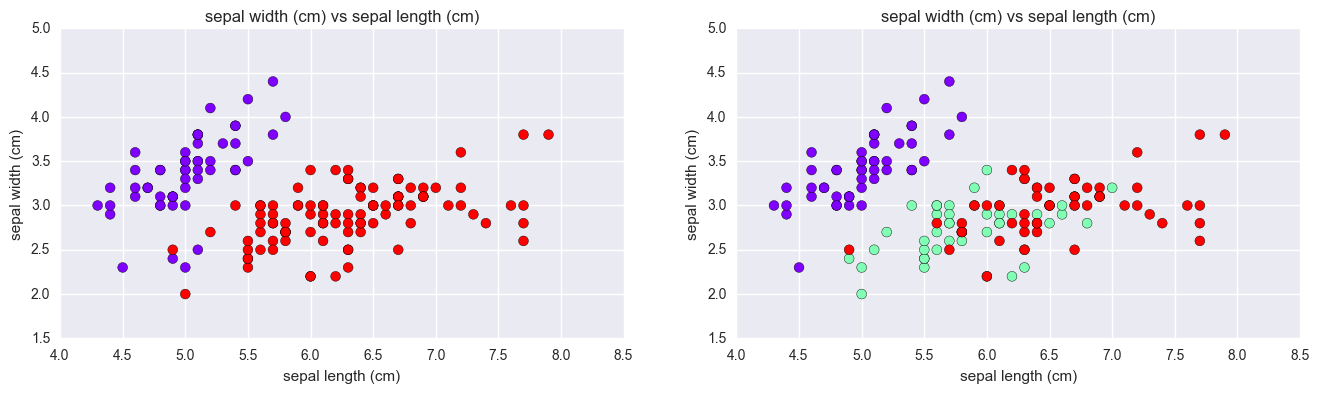

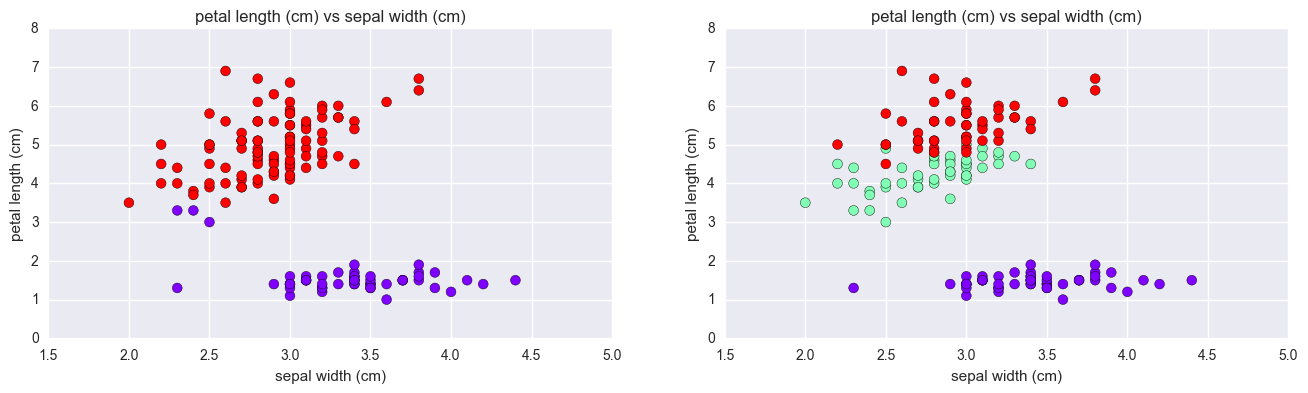

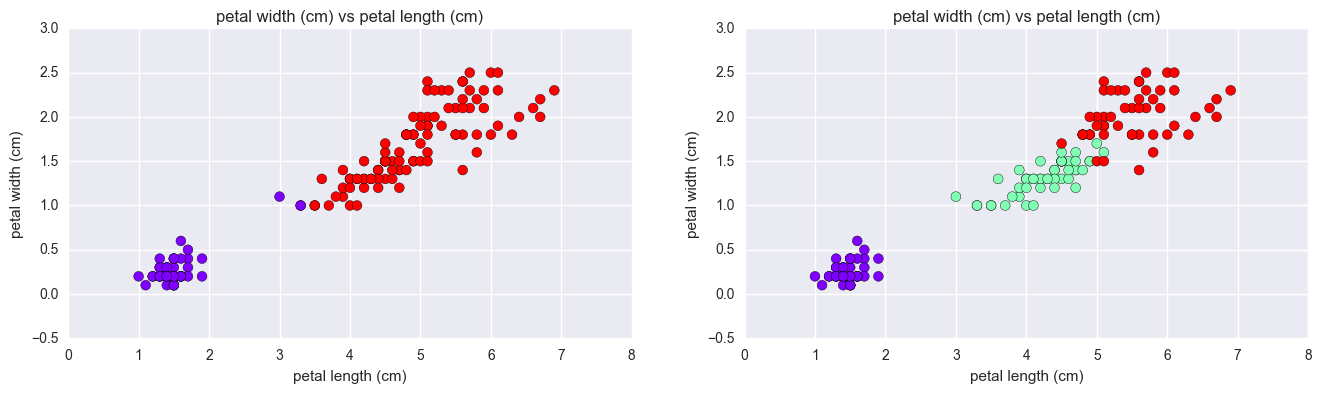

In [11]:
for i, _ in enumerate(X.columns[:-1]):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].scatter(X.iloc[:,i], X.iloc[:,i+1], c=labels, s=50, cmap='rainbow');
    ax[1].scatter(X.iloc[:,i], X.iloc[:,i+1], c=y, s=50, cmap='rainbow');
    ax[0].set_xlabel(X.columns[i]);
    ax[0].set_ylabel(X.columns[i+1]);
    ax[0].set_title(X.columns[i+1]+" vs "+X.columns[i]);
    ax[1].set_xlabel(X.columns[i]);
    ax[1].set_ylabel(X.columns[i+1]);
    ax[1].set_title(X.columns[i+1]+" vs "+X.columns[i]);
    plt.show();

Check the centroids to see where each cluster is lying 

In [12]:
centroids

array([[ 5.00566038,  3.36037736,  1.56226415,  0.28867925],
       [ 6.30103093,  2.88659794,  4.95876289,  1.69587629]])

Check the labels of the clusters

In [13]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Compute the accuracy score using scikit to see how accurate our analysis is

In [14]:
metrics.accuracy_score(y, labels)

0.64666666666666661

Compute the silhoutte coefficient to see how consistent our data is within the clusters

In [15]:
metrics.silhouette_score(X, labels)

0.68081362027879411

Calculate the Precision, Recall, and F - Score to see the test's accuracy

In [16]:
print metrics.classification_report(y, labels)

             precision    recall  f1-score   support

          0       0.94      1.00      0.97        50
          1       0.48      0.94      0.64        50
          2       0.00      0.00      0.00        50

avg / total       0.48      0.65      0.54       150



/Users/joce/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Compute the Confusion Matrix to test the performance of the clustering analysis

In [17]:
conmat = metrics.confusion_matrix(y, labels)
conmat = pd.DataFrame(conmat, index=iris_data.target_names, columns=iris_data.target_names)
conmat

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,3,47,0
virginica,0,50,0


# Trying with k=3

In [18]:
k = 3

In [19]:
km2 = cluster.KMeans(n_clusters=k)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Compute the labels and centroids

In [20]:
labels = km2.labels_
centroids = km2.cluster_centers_

In [21]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [22]:
centroids

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

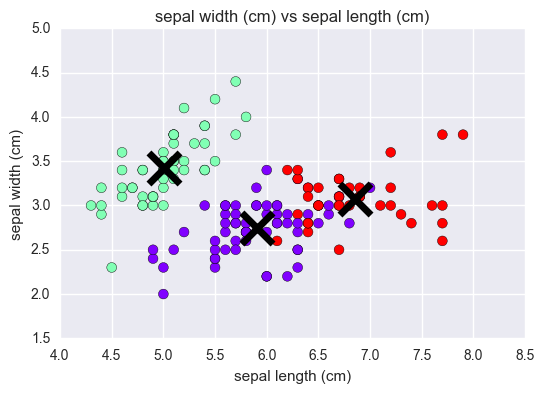

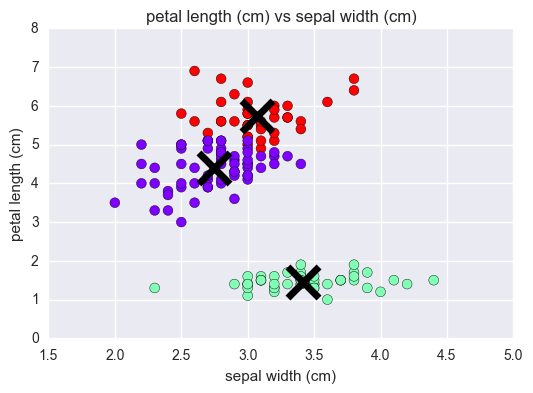

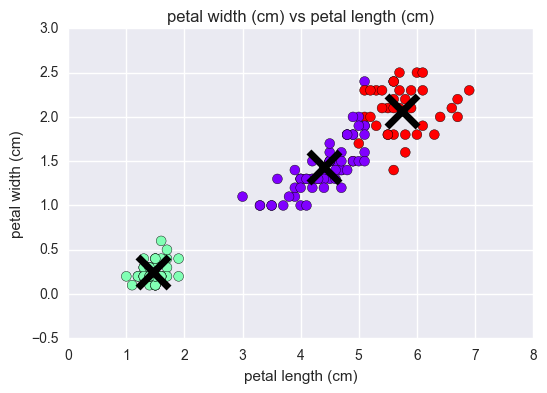

In [23]:
for i, _ in enumerate(X.columns[:-1]):
    plt.scatter(X.iloc[:,i], X.iloc[:,i+1], c=labels, s=50, cmap='rainbow');
    plt.scatter(centroids[:, i], centroids[:, i+1],
                marker='x', s=500, linewidths=5,
                color='k', zorder=10);
    plt.xlabel(X.columns[i]);
    plt.ylabel(X.columns[i+1]);
    plt.title(X.columns[i+1]+" vs "+X.columns[i]);
    plt.show();

Plot the predicted vs actual classifcations to see how our clustering analysis compares

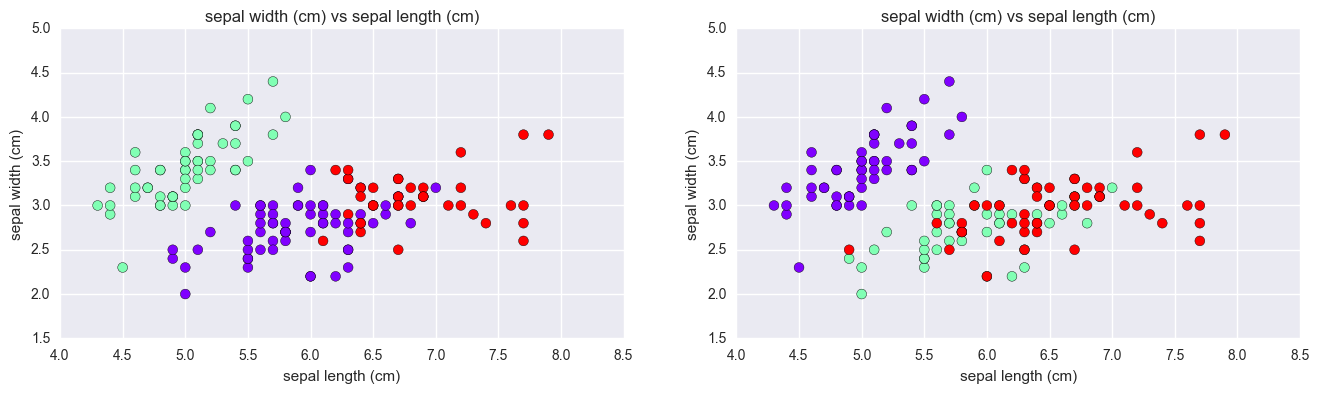

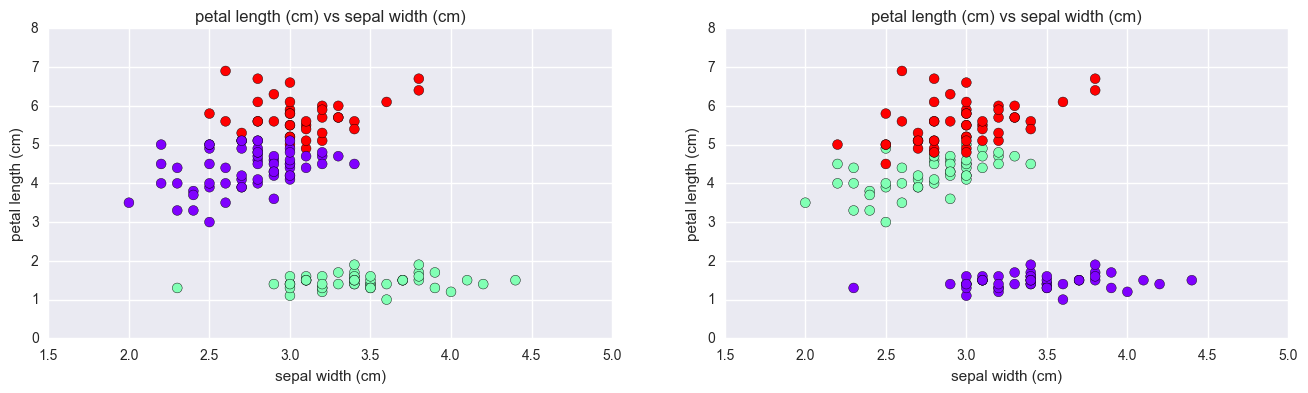

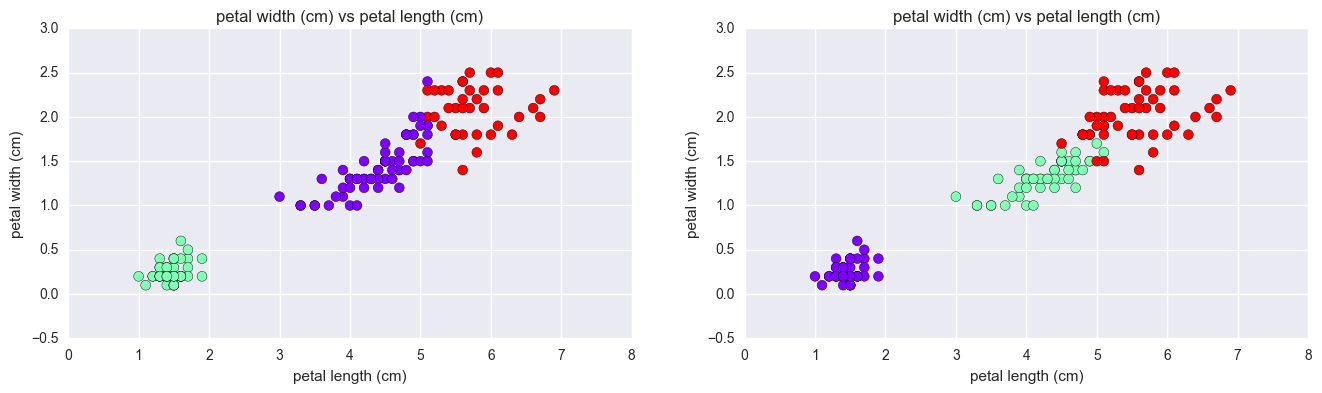

In [31]:
for i, _ in enumerate(X.columns[:-1]):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].scatter(X.iloc[:,i], X.iloc[:,i+1], c=labels, s=50, cmap='rainbow');
    ax[1].scatter(X.iloc[:,i], X.iloc[:,i+1], c=y, s=50, cmap='rainbow');
    ax[0].set_xlabel(X.columns[i]);
    ax[0].set_ylabel(X.columns[i+1]);
    ax[0].set_title(X.columns[i+1]+" vs "+X.columns[i]);
    ax[1].set_xlabel(X.columns[i]);
    ax[1].set_ylabel(X.columns[i+1]);
    ax[1].set_title(X.columns[i+1]+" vs "+X.columns[i]);
    plt.show();

Check the centroids to see where each cluster is lying 

In [25]:
centroids

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

Check the labels of the clusters

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
from scipy import stats
pred = km2.predict(X)
labels = np.zeros_like(pred)
for i in range(4):
    mask = (pred == i)
    labels[mask] = stats.mode(y[mask])[0]

In [34]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Compute the accuracy score using scikit to see how accurate our analysis is

In [35]:
metrics.accuracy_score(y, labels)

0.89333333333333331

Compute the silhoutte coefficient to see how consistent our data is within the clusters

In [36]:
metrics.silhouette_score(X, labels)

0.55259194453090321

Calculate the Precision, Recall, and F - Score to see the test's accuracy

In [37]:
print metrics.classification_report(y, labels)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.77      0.96      0.86        50
          2       0.95      0.72      0.82        50

avg / total       0.91      0.89      0.89       150



Compute the Confusion Matrix to test the performance of the clustering analysis

In [38]:
conmat = metrics.confusion_matrix(y, labels)
conmat = pd.DataFrame(conmat, index=iris_data.target_names, columns=iris_data.target_names)
conmat

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36
